<a href="https://colab.research.google.com/github/vasanthsai26/Jovian-Assignments/blob/main/pyTorch_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'1.13.0+cu116'

In [ ]:
### Sample data

weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
### train test splilt

train_split = int(len(X)*0.8)

X_train , y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
## visilize function
def plot_data(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=None):
    
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, 
                train_labels, 
                c="b", 
                s=6, 
                label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, 
                test_labels, 
                c="g", 
                s=6, 
                label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, 
                    predictions, 
                    c="r", 
                    s=6, 
                    label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

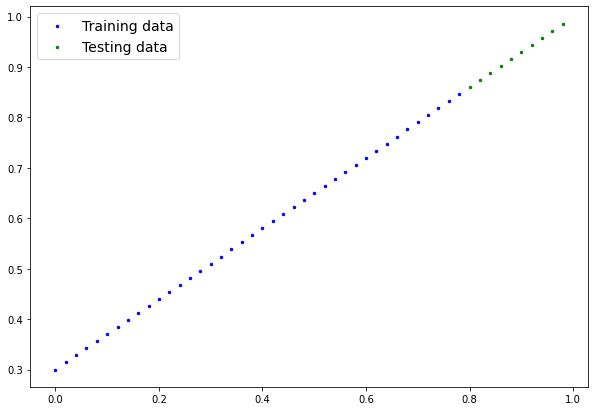

In [ ]:
plot_data()

In [ ]:
### Linear model using Linearregression
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float32,
                                                requires_grad=True)
        )
        self.bias =nn.Parameter(torch.randn(1,
                                                dtype=torch.float32,
                                               requires_grad=True)
        )
    def forward(self,X: torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
## foreard pass
with torch.inference_mode():
    y_preds = model_0(X_test)


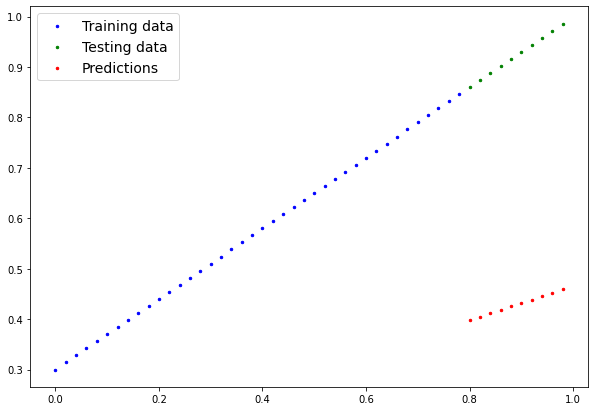

In [ ]:
plot_data(predictions=y_preds)

In [ ]:
### Creatng loss and optimiser
loss_fn = nn.L1Loss()
optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
### Training and Testring loop
epochs = 200

epoch_count = []
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):

    ### Training
    model_0.train() ## set the model in train mode so that the model starts learning
    y_pred = model_0(X_train) ### make a forward pass with the current paramters
    loss = loss_fn(y_pred,y_train) ## calculate the loss
    optimiser.zero_grad() ### to reset the gradients for this epoch
    loss.backward() ### computes gradients backwardsa wrt to loss
    optimiser.step() ### Compute the new paramaters with the gradients

    ### Testing
    model_0.eval() ## set the model in test mode so that all bacground gradient calculations are paused

    with torch.inference_mode():
        test_pred = model_0(X_test) ## forward pass with test data
        test_loss = loss_fn(test_pred,y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_list.append(loss.detach().numpy())
            test_loss_list.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 10 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 20 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 30 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 40 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 50 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 60 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 100 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 110 | MAE Train Loss: 0.0

In [ ]:
### Model is trained lets predcict 
print("new parameters:- ")
print(model_0.state_dict())

new parameters:- 
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


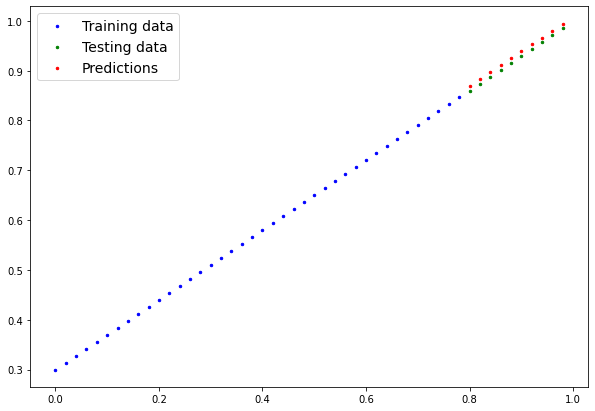

In [ ]:
# for first 200 epochs
with torch.inference_mode():
    test_preds = model_0(X_test)
plot_data(predictions=test_preds)    

In [ ]:
### Model is trained lets predcict 
print("new parameters:- ")
print(model_0.state_dict())

new parameters:- 
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


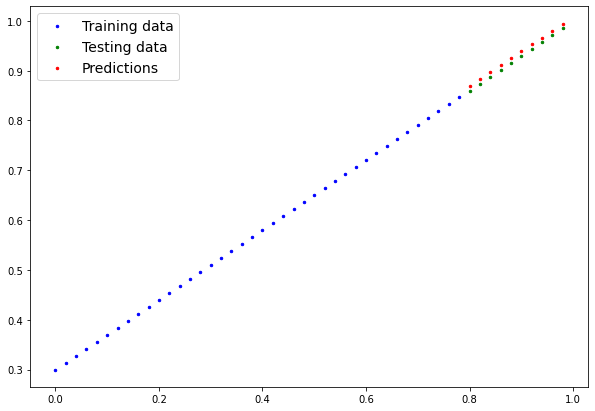

In [ ]:
with torch.inference_mode():
    test_preds = model_0(X_test)
plot_data(predictions=test_preds)

LinearRegression Model

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### Device agnostcic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
torch.cuda.is_available()

True

In [ ]:
### Sample data

weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(len(X)*0.80)
train_split

40

In [ ]:
# Train test split
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

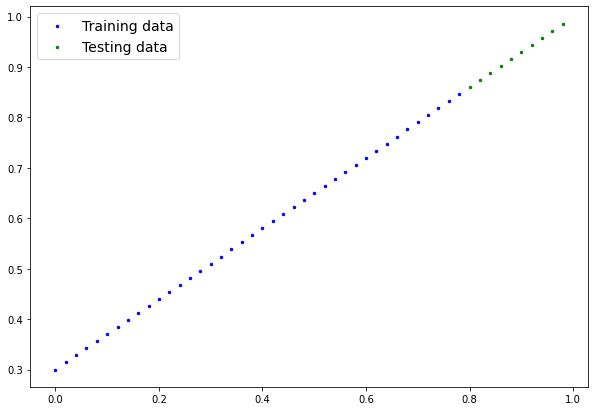

In [ ]:
plot_data(X_train.cpu().numpy(),y_train.cpu().numpy(),X_test.cpu().numpy(),y_test.cpu().numpy())

In [ ]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
### define loss function and optimiser
loss_fn = nn.L1Loss()
optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
### Training
epochs = 200 

for epoch in range(epochs):
    model_1.train() ## set the model to training mode
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred,y_train)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    model_1.eval()
    with torch.inference_mode():
        preds = model_1(X_test)
        test_loss = loss_fn(preds,y_test)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
model_1.state_dict()

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Train loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Train loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Train loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Train loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Train loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Train loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Train loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
    test_preds = model_1(X_test)
test_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [ ]:
abs(test_preds  - y_test).mean()

tensor(0.0003, device='cuda:0')

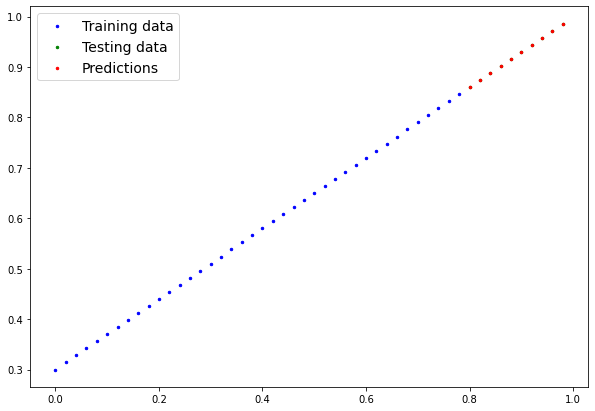

In [ ]:
plot_data(X_train.cpu().numpy(),y_train.cpu().numpy(),X_test.cpu().numpy(),y_test.cpu().numpy(),predictions=test_preds.cpu().numpy())

## classifiaction

In [ ]:
from sklearn.datasets import make_circles
n_samples = 2000

X,y = make_circles(n_samples=n_samples,
                   noise=0.03,
                   random_state=42)
len(X),len(y)

(2000, 2000)

In [ ]:
X[0:3,0]

array([ 0.47109875, -0.61696058, -0.3999557 ])

In [ ]:
X[:5,],y[:5]

(array([[ 0.47109875, -0.58158579],
        [-0.61696058,  0.80818956],
        [-0.3999557 ,  0.70796779],
        [ 0.82938523, -0.60057314],
        [-0.16419138,  0.76128858]]), array([1, 0, 1, 0, 1]))

In [ ]:
import pandas as pd
circles_data = pd.DataFrame({"X1":X[:,0],
                             "X2":X[:,1],
                             "label":y})
circles_data

,X1,X2,label
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1
...,...,...,...
1995,0.568918,0.583759,1
1996,-0.222517,0.756905,1
1997,0.628268,-0.739106,0
1998,-0.783659,0.163585,1


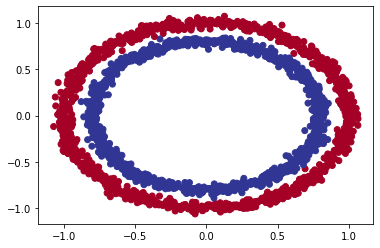

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
import torch
from torch import nn

In [ ]:
X.shape,y.shape

((2000, 2), (2000,))

In [ ]:
## Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5],y[:5]

(tensor([[ 0.4711, -0.5816],
         [-0.6170,  0.8082],
         [-0.4000,  0.7080],
         [ 0.8294, -0.6006],
         [-0.1642,  0.7613]]), tensor([1., 0., 1., 0., 1.]))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)
len(X_train),len(y_train),len(X_test),len(y_test)

(1600, 1600, 400, 400)

In [ ]:
# Create a classifiactrion model

class BinaryClassModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential_layer = nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=1),
            # nn.ReLU(),
            # nn.Linear(in_features=8,out_features=1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.sequential_layer(x)

torch.manual_seed(42)
model2 = BinaryClassModelV2().to(device)
model2

BinaryClassModelV2(
  (sequential_layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [ ]:
list(model2.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 

In [ ]:
model2.state_dict()

OrderedDict([('sequential_layer.0.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('sequential_layer.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('sequential_layer.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                   

In [ ]:
with torch.inference_mode():
    preds = model2(X_test.to(device))
preds[:10]

tensor([[0.0085],
        [0.0169],
        [0.0104],
        [0.0506],
        [0.0279],
        [0.0478],
        [0.0153],
        [0.0226],
        [0.0404],
        [0.0209]], device='cuda:0')

In [ ]:
y_test[:10]

tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 1.])

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(params=model2.parameters(),
                            lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [ ]:
### Training a model
# converting the output to 0 or 1 using sigmoid activation 
with torch.inference_mode():
    preds = model2(X_test.to(device)[:10])
torch.round(torch.sigmoid(preds))

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [ ]:
torch.eq(y_test[:10],torch.round(torch.sigmoid(preds)).squeeze().cpu())

tensor([ True,  True, False,  True, False,  True, False, False,  True,  True])

In [ ]:
torch.round(torch.sigmoid(preds)).squeeze().cpu()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
y_test[:10]

tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 1.])

Training 

In [ ]:
device

'cuda'

In [ ]:
!nvidia-smi

Thu Dec 15 09:44:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |    804MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

### convert that data to device type

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


### Training ang testing loop 

epochs = 2500 


for epoch in range(epochs):
    ### training mode
    model2.train()


    #### forward pass and calculate preds
    train_preds_logits = model2(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_preds_logits))

    ### calculate loss

    train_loss = loss_fn(train_preds_logits,y_train)
    train_acc = accuracy_fn(y_train,train_preds) 


    ### optimiser 
    optimiser.zero_grad()

    ## backprp
    train_loss.backward()

    ### step _incrememnt 

    optimiser.step()


    ### evaluation mode
    model2.eval()

    with torch.inference_mode():
        test_pred_logits = model2(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_pred_logits))

        test_loss = loss_fn(test_pred_logits,y_test)
        test_acc = accuracy_fn(y_test,test_preds)

        if epoch % 100 == 0 :
            print(f"Epoch : {epoch} | Train loss : {train_loss : 4f} , Train accuracy : {train_acc:2f} | Test loss : {test_loss : 4f} , Test accuracy : {test_acc : 2f}")


Epoch : 0 | Train loss :  0.693012 , Train accuracy : 49.812500 | Test loss :  0.692786 , Test accuracy :  50.750000
Epoch : 100 | Train loss :  0.690943 , Train accuracy : 52.625000 | Test loss :  0.691041 , Test accuracy :  52.500000
Epoch : 200 | Train loss :  0.689292 , Train accuracy : 53.000000 | Test loss :  0.689550 , Test accuracy :  53.000000
Epoch : 300 | Train loss :  0.687025 , Train accuracy : 53.250000 | Test loss :  0.687399 , Test accuracy :  52.750000
Epoch : 400 | Train loss :  0.683252 , Train accuracy : 53.625000 | Test loss :  0.684111 , Test accuracy :  52.750000
Epoch : 500 | Train loss :  0.677607 , Train accuracy : 54.437500 | Test loss :  0.679499 , Test accuracy :  53.000000
Epoch : 600 | Train loss :  0.668652 , Train accuracy : 56.812500 | Test loss :  0.672323 , Test accuracy :  55.000000
Epoch : 700 | Train loss :  0.656308 , Train accuracy : 63.875000 | Test loss :  0.662549 , Test accuracy :  60.500000
Epoch : 800 | Train loss :  0.635584 , Train accur

In [ ]:
import requests 
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("File exists")
else:
    print("Downloaing the function")
    page = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(page.content)
from helper_functions import plot_decision_boundary,plot_predictions

File exists


In [ ]:
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model2(X_test).squeeze())).cpu()
y_preds

tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 0., 0., 0., 1., 1., 1., 0., 

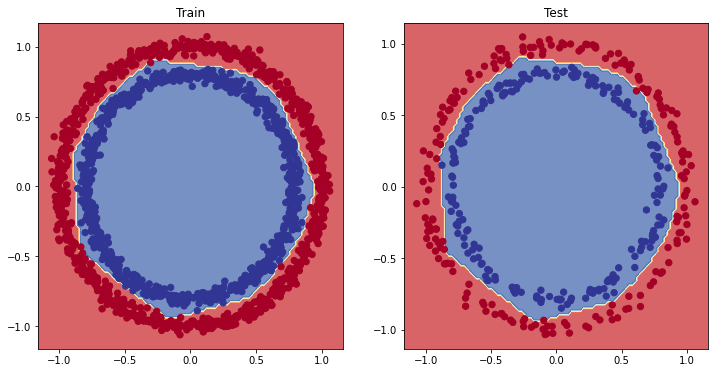

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, X_test, y_test) # model_3 = has non-linearity



Multi class classification

In [68]:
from sklearn.datasets import make_blobs
import torch
import matplotlib.pyplot as plt
import pandas as pd 


N_SAMPLES = 2000
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X,y = make_blobs(n_samples=N_SAMPLES, 
                 n_features=NUM_FEATURES,
                 centers=NUM_CLASSES, 
                 cluster_std=1.5,  
                 shuffle=True, 
                 random_state=RANDOM_SEED)

X.shape,y.shape

((2000, 2), (2000,))

In [69]:
### coverting to torch tensors  

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [70]:
### train test split 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)
len(X_train),len(y_train),len(X_test),len(y_test)

(1600, 1600, 400, 400)

In [71]:
X_train[:5]

tensor([[-11.5653,   8.4631],
        [  5.7022,   2.3230],
        [-10.8976,   7.8507],
        [ -9.0975,   8.4814],
        [ -3.4791,   7.3920]])

In [72]:
torch.unique(y_train)

tensor([0., 1., 2., 3.])

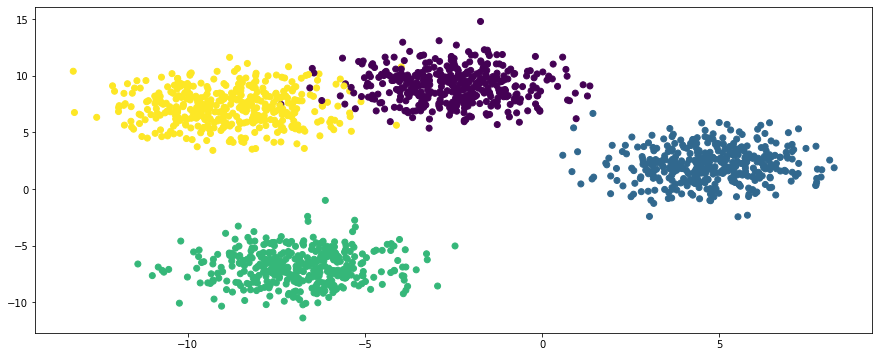

In [73]:
plt.figure(figsize=(15,6))
plt.scatter(x=X_train[:,0].cpu().numpy(),
            y=X_train[:,1].cpu().numpy(),
            c=y_train.cpu().numpy())
plt.show();

In [74]:
device = "cuda" if torch.cuda.is_available() else "cpu" 
device

'cpu'

In [75]:
### Multi class classification model 
import torch.nn as nn
class MultiClassModelV1(nn.Module):
    def __init__(self,input_features: int,output_features: int) -> None:
        super().__init__()
        self.model_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16,out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8,out_features=output_features)
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.model_layer_stack(x)

torch.manual_seed(42)
multimodel = MultiClassModelV1(input_features=2,
                               output_features=4).to(device)
multimodel

MultiClassModelV1(
  (model_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [76]:
# list(multimodel.parameters())
multimodel.state_dict()

OrderedDict([('model_layer_stack.0.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]])),
             ('model_layer_stack.0.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265])),
             ('model_layer_stack.2.weight',
              tens

In [77]:
### making predcitions 
with torch.inference_mode():    
    preds = multimodel(X_test)
preds

tensor([[ 0.0840, -0.1099, -0.0386, -0.3191],
        [ 0.1475,  0.0859, -0.1922, -0.1579],
        [-0.0127, -0.0046, -0.0749, -0.1917],
        ...,
        [ 0.0447, -0.0741,  0.0255, -0.2109],
        [ 0.0719, -0.1023,  0.0195, -0.2583],
        [ 0.2593,  0.3764, -0.3454,  0.1556]])

In [78]:
preds.shape

torch.Size([400, 4])

In [79]:
torch.argmax(torch.softmax(preds,dim=1),dim=1)[:10]

tensor([0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [80]:
y_test[:10]

tensor([0., 2., 3., 2., 3., 3., 1., 1., 3., 0.])

In [81]:
### define loss and optimiser fucntions

loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(params=multimodel.parameters(),
                          lr=0.01)

In [82]:
### Training and testing loops
from sklearn.metrics import accuracy_score

torch.manual_seed(42)
torch.cuda.manual_seed(42)

### moving data to device

X_train,y_train = X_train.to(device),y_train.type(torch.long).to(device) ### converting the labels to int64 as pytorch requires the categorical outputs in int64form
X_test,y_test = X_test.to(device),y_test.type(torch.long).to(device)

EPOCHS = 2000 

for epoch in range(EPOCHS):
    multimodel.train() ### setting the training mode

    ### calculate the predictions by a forward pass
    y_train_raw = multimodel(X_train)
    y_train_preds = torch.argmax(torch.softmax(y_train_raw,dim=1),dim=1)

    ### calculate the loss 
    train_loss = loss_fn(y_train_raw,y_train)
    train_acc = accuracy_score(y_train,y_train_preds)
    
    ### reset the grds
    optimiser.zero_grad()

    ### backpropagation to calculate gradients 
    train_loss.backward()

    ### update the parameters 
    optimiser.step()

    multimodel.eval()
    with torch.inference_mode():
        y_test_raw = multimodel(X_test)
        y_test_preds = torch.argmax(torch.softmax(y_test_raw,dim=1),dim=1)

        ### calculate the loss 
        test_loss = loss_fn(y_test_raw,y_test)
        test_acc = accuracy_score(y_test,y_test_preds) 

        if epoch % 100 == 0:
            print(f"Epoch : {epoch} | Train loss : {train_loss:5f} , Train acc : {train_acc:2f} | Test loss : {test_loss:5f} , Test acc : {test_acc:2f}")

Epoch : 0 | Train loss : 1.338762 , Train acc : 0.492500 | Test loss : 1.243021 , Test acc : 0.660000
Epoch : 100 | Train loss : 0.028126 , Train acc : 0.990625 | Test loss : 0.020124 , Test acc : 0.995000
Epoch : 200 | Train loss : 0.026196 , Train acc : 0.990625 | Test loss : 0.017132 , Test acc : 0.995000
Epoch : 300 | Train loss : 0.024832 , Train acc : 0.991250 | Test loss : 0.014680 , Test acc : 0.995000
Epoch : 400 | Train loss : 0.023928 , Train acc : 0.990625 | Test loss : 0.012776 , Test acc : 0.995000
Epoch : 500 | Train loss : 0.023423 , Train acc : 0.990625 | Test loss : 0.011484 , Test acc : 0.995000
Epoch : 600 | Train loss : 0.023173 , Train acc : 0.990625 | Test loss : 0.010752 , Test acc : 0.997500
Epoch : 700 | Train loss : 0.023021 , Train acc : 0.990625 | Test loss : 0.010382 , Test acc : 0.995000
Epoch : 800 | Train loss : 0.022902 , Train acc : 0.990625 | Test loss : 0.010196 , Test acc : 0.995000
Epoch : 900 | Train loss : 0.022789 , Train acc : 0.990625 | Test 

In [83]:
import requests 
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("File exists")
else:
    print("Downloaing the function")
    page = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(page.content)
from helper_functions import plot_decision_boundary,plot_predictions    


Downloaing the function


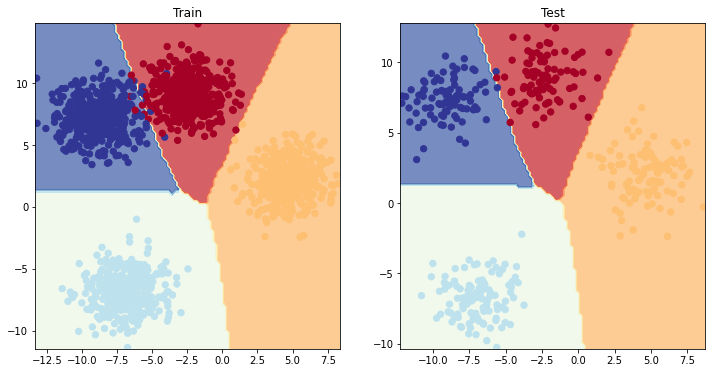

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(multimodel, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(multimodel, X_test, y_test) # model_3 = has non-linearity